# Plane Boarding Simulation

#### Prerequisites

The project was created and tested using Python 3.7\
Additionally the renderer requires Pygame module installed.

This document was created in Jupyter Notebook using matplotlib and numpy modules.\
It was then exported as HTML for easier access without this software.

### Simulation architecture description

The central part of the program is the `run` function from the `runner` module. Given the variable parameters at the input together with static parameters from `parameters` module it orchestrates the whole simulation. It's responsible for maintaning `execution_queue` heap for agents' actions as well as the `board` 2d list which provides agents with the information about their neighbourhood.
The function `run` is a `generator`. That means we can easily iterate over values yielded by it. In this case generated values are sequential changes made by the agents. This behaviour is used in the module responsible for rendering. Even though it's separated from the rest of the code, it operates lazily. The strict renderer - on the other hand - would have to first generate all the data and only then it would be able to display it.

The inner workings of the `run` function can be described as follows:
0. initialize `execution_queue` and `board` using `initialize` function to get state appropriate to the specified parameters (like `boarding_method`)
1. yield all the agents' states
2. loop until `execution_queue` is empty or tick limit exceeded:
    0. take one agent from it
    1. make the agent conduct next action using the `act` method and the current context
    2. put agent back into the queue unless it wont take action anymore
    3. yield agent's new state


To make the method `act` work, each agent maintains its current state. It consists mainly of the `target`, `coords`, `state` fields. Based on these as well as its neighbourhood (obtained from `board`), each agent when `act`ed on, can `move` or change its `state`.

The major `state`s are:
0. `go` - responsible for moving towards the seat
1. `luggage` - responsible for bag stowing
2. `waiting` - responsible for noticing agents that need to be let in
3. `shuffle_*` - responsible for the shuffles
4. `done` - agent won't activate anymore; it has no other `act`ion to take

### Efficiency of  different boarding strategies

In [1]:
import matplotlib.pyplot as plt
import numpy
import statistics
import pickle

In [2]:
with open("./pickle_dumps/batch_methods_500_664078.pkl", 'rb') as f:
    batch_methods = pickle.load(f)

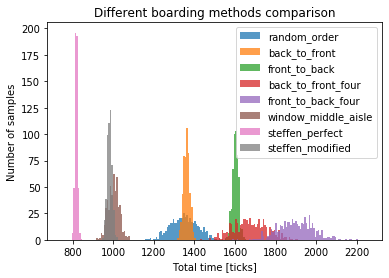

In [3]:
bins = numpy.linspace(750, 2250, 200)

for boarding_method, times in batch_methods.items():
    times = [t for t in times if t is not None]
    plt.hist(times, bins=bins, alpha=0.75, label=boarding_method)

plt.title("Different boarding methods comparison")
plt.xlabel("Total time [ticks]")
plt.ylabel("Number of samples")
plt.legend(loc='upper right')
plt.show()

### Seat shuffles and bag stowings impact comparison

In [4]:
with open("./pickle_dumps/batch_comparison_500_664078.pkl", 'rb') as f:
    batch_comparison = pickle.load(f)

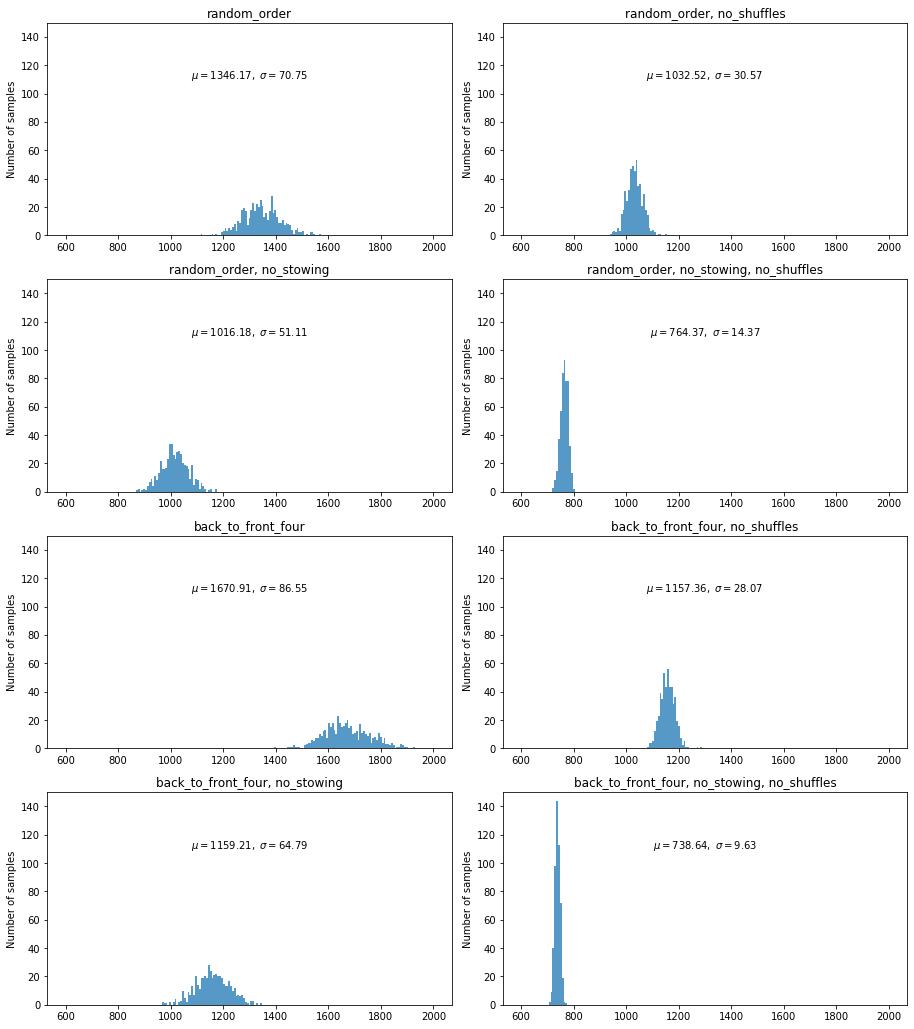

In [5]:
bins = numpy.linspace(600, 2000, 200)
top = 150

fig = plt.figure(figsize=(6.4*2, 4.8*3))

for i, (bmt, timesss) in enumerate(batch_comparison.items()):
    for j, (nsh, timess) in enumerate(timesss.items()):
        for k, (nst, times) in enumerate(timess.items()):
            ax = plt.subplot(4, 2, (4*i + 1*j + 2*k + 1))
            
            times = [t for t in times if t is not None]
            ax.hist(times, bins=bins, alpha=0.75)
            ax.set_ylim(top=top)
            
            mu = statistics.mean(times)
            sigma = statistics.stdev(times)
            ax.text(0.5, 0.75, f"$\\mu={mu:.2f},\\ \\sigma={sigma:.2f}$",
            horizontalalignment='center',
            verticalalignment='center',
            transform = ax.transAxes)

            ax.set_title(bmt + (", no_stowing" if nst else "") + (", no_shuffles" if nsh else ""))
            # ax.set_xlabel('')
            ax.set_ylabel("Number of samples")

fig.tight_layout()
plt.show()

In [6]:
for i, (bmt, timesss) in enumerate(batch_comparison.items()):
    for j, (nsh, timess) in enumerate(timesss.items()):
        for k, (nst, times) in enumerate(timess.items()):
            print(len([None for time in times if time%2==0]))

228
252
258
263
241
247
241
240
